# Uncertainty & Quantum Money
<hr></hr>

<a name="back1"></a> Quantum money refers to a cryptographic protocol designed to protect certain assets (like currency) from being copied and counterfeited. It was first proposed by Stephen Wiesner and published in 1983 in his paper entitled "Conjugate Coding" [[Weisner83]](https://dl.acm.org/doi/pdf/10.1145/1008908.1008920)[$^*$](#footnote1).

The protocol relies on the [uncertainty principle](https://en.wikipedia.org/wiki/Uncertainty_principle) of quantum mechanics, which states that there is a fundamental limit to how precisely one can simultaneously determine the values of two physical properties of a quantum system, commonly referred to as complementary or **conjugate** variables. In the original paper, this is exemplified using spin $1/2$ particles, but as we've seen in previous chapters, we can map spin to the more general framework of quantum circuits, and use the values a qubit takes in either the bit basis or sign basis as the pair of conjugate properties.

## 1. Quantum Uncertainty

The uncertainty principle is most typically introduced in the context of a particle with position $x$ and momentum $p.$ According to the rules of quantum mechanics, the precision with which these two properties can be simultaneously measured is constrained by the following Heisenberg's uncertainty inequality:

$$ \Delta x\Delta p \geq \frac{\hbar}{2} .$$

Here, $\Delta x$ and $\Delta  p$ correspond to the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation#Standard_deviation_of_the_mean) of position and momentum, respectively, and $\hbar$ is the [reduced Planck constant](https://en.wikipedia.org/wiki/Planck_constant#Reduced_Planck_constant). This equation basically says that, if one tries to, for example, measure the position of a particle very precisely (making $\Delta x$ very small), the uncertainty in the momentum (specified by $\Delta p$) must grow to guarantee that their product is always larger or equal to a fundamental constant, given by $\hbar/2$.

The concept of uncertainty generalizes to many other pairs of conjugate properties, such as the perpendicular directions along which the spin of an electron is measured, or in our case, two orthogonal basis a qubit can be measured in. 

In this section, we will introduce the concept of uncertainty using a simple example that captures the spirit of this idea, and then discuss the formal formulation of the uncertainty principle using observables (although, these details, which are presented in section 1.2, won't be necessary to understand the quantum money protocol, so feel free to skip it).

### 1.1 Understanding Quantum Uncertainty

Let's consider the case of a classical bar magnet with its north pointing diagonally along one of the following four directions $(\textit{I}, \textit{II}, \textit{III}, \textit{IV})$:

<img src="images/03_01_01_barmag_orientation.png" align = "center" width="800"/>

One way to figure out in which of these four configurations a magnet could be in, is by using a set of Stern-Gerlach (SG) devices:

<img src="images/03_01_02_barmag_SG.png" align = "center" width="600"/>

Passing bar magnets with their north pointing in directions $\textit{I}$ and $\textit{II}$ through the first SG apparatus, which has its magnetic field gradient along the $\texttt{+}x$ direction, will cause the magnets to deflect in the $\texttt{+}x$ direction. On the other hand, magnets in configurations $\textit{III}$ and $\textit{IV}$ will be deflected in the $\texttt{-}x$ direction. 

We can then take the magnets that deflected in the $\texttt{+}x$ direction and pass them through a second SG device with its gradient along the $\texttt{+}z$ direction. This will deflect magnets in configuration $\textit{I}$ in the $\texttt{+}z$ direction, and magnets configuration $\textit{II}$ in the $\texttt{-}z$ direction. Doing the same with magnets that deflected in the $\texttt{-}x$ direction will then allow us to clearly identify the four possible configurations by looking at where in the screen the magnets landed.

But what if we want to perform the experiment with electrons instead?:

<img src="images/03_01_04_spin_orientation.png" align = "center" width="800"/>

We could try running them through the same series of SG devices; however, as we've shown before, the non-deterministic behavior of these particles introduces a few challenges:

<img src="images/03_01_03_spin_SG.png" align = "center" width="600"/>

The first issue is that, running an electron-like particle through the first SG apparatus will deflect it **probabilistically** in either the $\texttt{+}x$ or $\texttt{-}x$ direction with probabilities of:

$$ P_{\texttt{+}x}(\theta) = \frac{1}{2}\big(1 + \sin(\theta) \big) \quad \text{and} \quad P_{\texttt{-}x}(\theta) = \frac{1}{2}\big(1 - \sin(\theta) \big) .$$

Therefore, if we want to figure out the particle's direction along the $x$ axis, we need to be able to prepare the same configuration more than once, and collect statistics of the results. Assuming we can do this, it is then not so difficult to figure out if the particle is in either configurations $\textit{I} \text{-} \textit{II}$, or in configurations $\textit{III} \text{-} \textit{IV} .$ This is because: 

- For configurations $\textit{I}$ and $\textit{II}$, the corresponding angles are $\pi/4$ and $3\pi/4$, which result in a high probability of the particle deflecting in the $\texttt{+}x$ direction:


    $$ P_{\texttt{+}x}\left(\frac{\pi}{4}\right) = P_{\texttt{+}x}\left(\frac{3\pi}{4}\right) \approx 0.853 \quad \text{and} \quad P_{\texttt{-}x}\left(\frac{\pi}{4}\right) = P_{\texttt{-}x}\left(\frac{3\pi}{4}\right) \approx 0.146 .$$

- For configurations $\textit{III}$ and $\textit{IV}$, the corresponding angles are $5\pi/4$ and $7\pi/4$, which result in a high probability of the particle deflecting in the $\texttt{-}x$ direction:


    $$ P_{\texttt{+}x}\left(\frac{5\pi}{4}\right) = P_{\texttt{+}x}\left(\frac{7\pi}{4}\right) \approx 0.146 \quad \text{and} \quad P_{\texttt{-}x}\left(\frac{5\pi}{4}\right) = P_{\texttt{-}x}\left(\frac{7\pi}{4}\right) \approx 0.853 .$$
    
    
Now, here is the real problem. Once we run a particle through the first SG device, its spin will be projected to point along the $\texttt{+}x$ or $\texttt{-}x$ direction. So, running these particles through the second SG apparatus, which is oriented along the $z$ axis, will cause them to deflect either upwards or downwards but not with a probability associated with the original particle's orientation! Rather, the probability of the particle deflecting up or down is always $1/2$. In other words, performing a measurement along the $x$ axis in a sense "scrambles" the information about the particle's original $z$ orientation, preventing us from knowing in which of the four configurations the particle was in. Therefore, there is simply no way to measure both the $x$ and $z$ orientation of an electron using this setup.

We then say that these observable properties (spin along $x$, and spin along $z$) are **incompatible**. Just like the position and momentum of a moving particle, $x$-spin and $z$-spin are conjugate variables, which means that measuring one of them increases our uncertainty of the other. This seems like an annoying inconvenience; however, it is precisely this property that the quantum money protocol exploits to make some valuable asset secure.

**NOTE**: The material covered in section 1.1 should be more than enough to provide the background necessary for the quantum money protocol. Section 1.2 simply provides a more detailed description of the uncertainty principle in the context of qubits and it is therefore not strictly necessary to understand quantum money.

### 1.2 Quantum Uncertainty with Qubits

Since electron spin is one of the many different physical implementations for a qubit, it should be no surprise that the same effect of incompatible observables we saw above shows up in the case of a general qubit. Therefore, we can construct an uncertainty relation using the language of statevectors and observables we have previously introduced.

To keep things simple, let's first consider the case of a qubit in the $xz$-plane, pointing at some angle $\theta$ with respect to the $+z$ direction:

$$|q\rangle = \cos\left(\frac{\theta}{2} \right)|0\rangle + \sin\left(\frac{\theta}{2} \right)|1\rangle $$

[Recall](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#quantum-observables) that, we can calculate the expectation value of measuring the $Z$ observable as:

$$ 
\begin{aligned}
\langle Z \rangle_q &= \langle q | Z | q \rangle_q 
\\
\\
\langle Z \rangle_q &= \left[\cos\left(\frac{\theta}{2} \right)\langle 0| + \sin\left(\frac{\theta}{2} \right) \langle 1|\right] Z \left [\cos\left(\frac{\theta}{2} \right)|0\rangle + \sin\left(\frac{\theta}{2} \right)|1\rangle \right]
\\
\\
\langle Z \rangle_q &= \cos^2 \left(\frac{\theta}{2} \right) - \sin^2\left(\frac{\theta}{2}\right) 
\\
\\
\langle Z \rangle_q &= \cos \left(\theta\right).
\end{aligned}
$$

Similarly, we can do the same for the $X$ observable:

$$ 
\begin{aligned}
\langle X \rangle_q &= \langle q | X | q \rangle_q 
\\
\\
\langle X \rangle_q &= \left[\cos\left(\frac{\theta}{2} \right)\langle 0| + \sin\left(\frac{\theta}{2} \right) \langle 1|\right] X \left [\cos\left(\frac{\theta}{2} \right)|0\rangle + \sin\left(\frac{\theta}{2} \right)|1\rangle \right]
\\
\\
\langle X \rangle_q &= 2\cos \left(\frac{\theta}{2} \right) \sin\left(\frac{\theta}{2}\right)
\\
\\
\langle X \rangle_q &= \sin\left(\theta\right) .
\end{aligned}
$$

To compute the standard deviation for each of these observables, we can use the definition of the [variance](https://en.wikipedia.org/wiki/Variance) (the standard deviation squared) as a function of the expectation value:

$$ \Delta {O}^2 = \langle O^2 \rangle_q - \langle O \rangle_q^2 ,$$

where $O$ is either $Z$ or $X$. For the first part of this expression, we have that $X^2 = Z^2 = I$, therefore:

$$ \langle O^2 \rangle_q = \langle q | I | q \rangle = \langle q | q \rangle = 1 .$$

So, for the $Z$ observable:

$$ 
\begin{aligned}
\Delta {Z} &= \sqrt{\langle Z^2 \rangle_q - \langle Z \rangle_q^2} 
\\
\\
\Delta {Z} &= \sqrt{1 - \cos^2 \left(\theta\right)}
\\
\\
\Delta {Z} &= \big| \sin(\theta) \big|.
\end{aligned}
$$

Similarly, for $X$ we have:

$$ 
\begin{aligned}
\Delta {X} &= \sqrt{\langle X^2 \rangle_q - \langle X \rangle_q^2} 
\\
\\
\Delta {X} &= \sqrt{1 - \sin^2 \left(\theta\right)}
\\
\\
\Delta {X} &= \big| \cos(\theta) \big|.
\end{aligned}
$$

If we plot these two values, we can see how when the uncertainty of measuring one of these observables (i.e., its standard deviation) decreases, the uncertainty in the other observable increases. As a matter of fact, fot the specific case of $X$ and $Z$, when the uncertainty of one of them is minimum, the uncertainty in the other is maximum, as expected.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

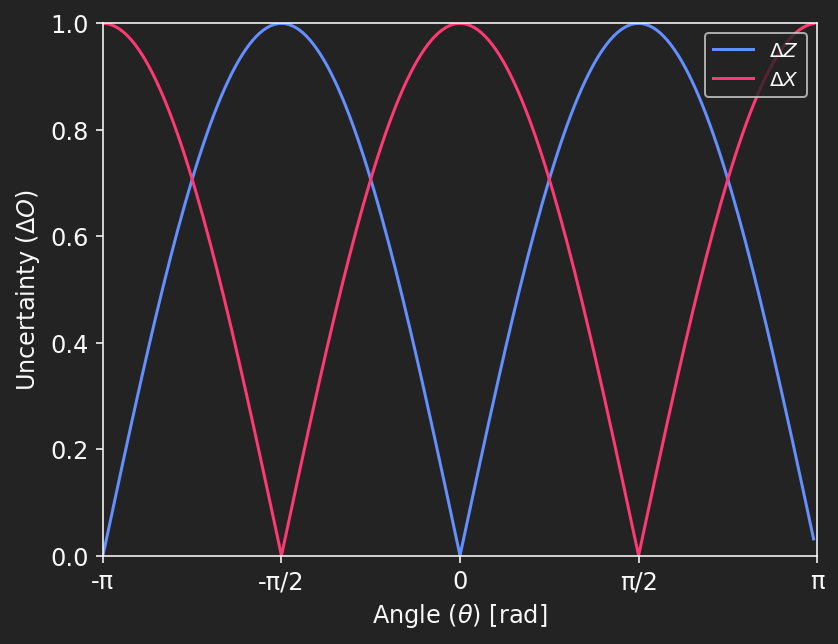

In [2]:
θ_arr = np.arange(-np.pi, np.pi, np.pi/100)
ΔZ = np.abs(np.sin(θ_arr))
ΔX = np.abs(np.cos(θ_arr))

plt.plot(θ_arr,ΔZ)
plt.plot(θ_arr,ΔX)

plt.xlim([-np.pi,np.pi])
plt.ylim([0,1])
plt.xticks(ticks=[-np.pi,-np.pi/2, 0, np.pi/2, np.pi],
           labels=['-π','-π/2', '0', 'π/2', 'π'],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Uncertainty $(\\Delta O)$',fontsize=12)
plt.xlabel('Angle $(\\theta)$ [rad]',fontsize=12)
plt.legend(['$\\Delta Z$', '$\\Delta X$'], loc = 'upper right')
plt.show()

In the above, we only consider qubits in the $xy$-plane. However, we can find a more general uncertainty relation for a single qubit by using the expression that includes the relative phase term:

$$|q\rangle = \cos\left(\frac{\theta}{2} \right)|0\rangle + e^{i\varphi} \sin\left(\frac{\theta}{2} \right)|1\rangle, $$

in combination with the definition of the [uncertainty relation](https://en.wikipedia.org/wiki/Uncertainty_principle#Mathematical_formalism), given by:

$$ \Delta A \Delta B \geq \frac{1}{2} \big| \left \langle \left[ A, B \right ] \right \rangle \big| .$$

Here, $\left[ A, B \right ]$ is known as the [commutator](https://en.wikipedia.org/wiki/Commutator#Ring_theory) of observables $A, B$, which is equal to:

$$\left[ A, B \right ] = AB - BA .$$

In the particular case of observables $X, Y, Z, $ we have the following commutation relations:

$$\left[ X, Y \right ] = 2iZ, \quad \left[ Y, Z \right ] = 2iX, \quad \left[ Z, X \right ] = 2iY .$$

So, going back to the uncertainty relation between observables $Z$ and $X$, we get the following inequality:

$$ \Delta Z \Delta X \geq \big| \left \langle iY \right \rangle \big| ,$$

where $\Delta Z$, $\Delta X$, and $\langle iY \rangle$, should of course be calculated using the expression for $|q\rangle$ that includes the relative phase term $e^{i\varphi} .$ 

For the first two terms we get:

$$ 
\begin{aligned}
\Delta Z &= \sqrt{1 - \cos^2(\theta)} = \big|\sin(\theta) \big|
\\
\\
\Delta X &= \sqrt{1 - \sin^2(\theta)\cos^2(\varphi)} .
\end{aligned}
$$

And for the right-hand side of the inequality we have:

$$ \big| \left \langle iY \right \rangle \big| = \big|\sin(\theta) \sin(\varphi) \big| .$$

This means that the following inequality must hold for all values of $\theta$ and $\varphi$:

$$ 
\begin{aligned}
\big|\sin(\theta) \big| \sqrt{1 - \sin^2(\theta)\cos^2(\varphi)} &\geq \big|\sin(\theta) \sin(\varphi) \big| 
\\
\\
\sqrt{1 - \sin^2(\theta)\cos^2(\varphi)} &\geq \big| \sin(\varphi) \big| .
\end{aligned}
$$

It is not very difficult to see that this must be true since the maximum value the left-hand side can take is $1$, which is always greater or equal to the maximum value the right-hand side can take, which is also $1$. However, let's plot both sides of the inequality to see how they compare as a function of $\theta$ and for a few values of $\varphi$:

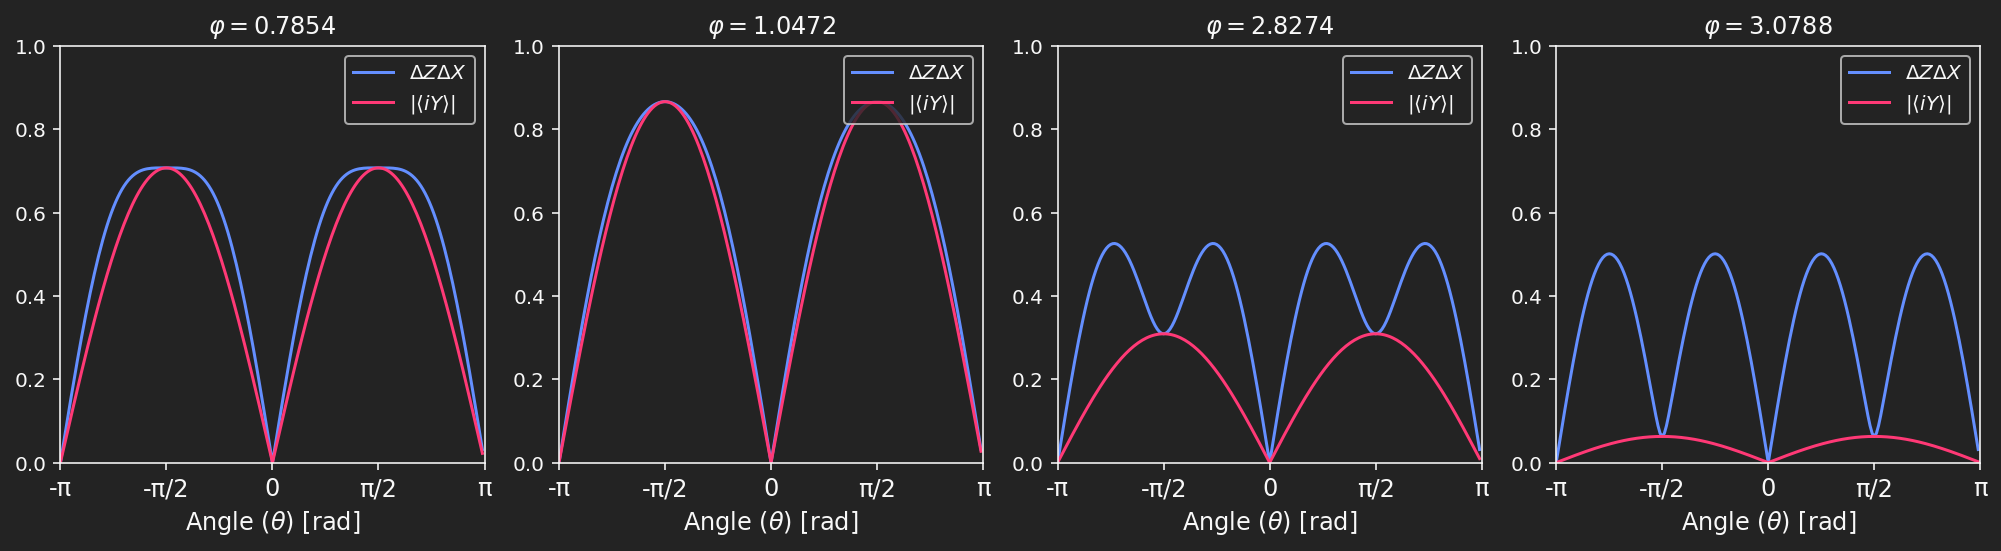

In [3]:
# Plot uncertainty relation for X, Z observables for statevector
# |q⟩ = cos(θ/2)|0⟩+exp(iφ)sin(θ/2)|1⟩ using different values of θ and φ

θ_arr = np.arange(-np.pi, np.pi, np.pi/100)
φ_lst = [np.pi/4, 2*np.pi/6, 9*np.pi/10, 49*np.pi/50]

fig, axes = plt.subplots(1, len(φ_lst), figsize=(14, 4))  # 3 rows, 1 column

for i, φ_val in enumerate(φ_lst):
    ΔZ = np.abs(np.sin(θ_arr))
    ΔX = np.sqrt(1-np.sin(θ_arr)**2 * np.cos(φ_val)**2)
    Ys = np.abs(np.sin(θ_arr)*np.sin(φ_val))
    
    axes[i].plot(θ_arr,ΔZ*ΔX, label="$\\Delta Z \\Delta X$")
    axes[i].plot(θ_arr,Ys, label="$| \\langle iY \\rangle |$")
    
    axes[i].set_xlim([-np.pi,np.pi])
    axes[i].set_xticks(ticks=[-np.pi,-np.pi/2, 0, np.pi/2, np.pi],
                       labels=['-π','-π/2', '0', 'π/2', 'π'],fontsize=12)
    axes[i].set_ylim([0,1])
    axes[i].set_title(f'$\\varphi = ${np.around(φ_val,4)}')
    axes[i].legend(loc='upper right')
    axes[i].set_xlabel('Angle $(\\theta)$ [rad]',fontsize=12)

plt.tight_layout()
plt.show()

From these plots, it is clear that, for every value of $\theta$ and $\varphi$ the uncertainty relation $ \Delta Z \Delta X \geq \left| \left \langle iY \right \rangle \right| $ is always satisfied.

We can also use Qiskit's Estimator primitive to compute the expectation value and standard deviation for a given statevector and observable. Let's perform this simulation and compare it with the theoretical results above:

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Estimator

estimator = Estimator(mode=AerSimulator())

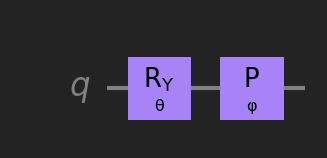

In [5]:
# Use the Paramater class to define arbitrary angles of θ and φ
θ = Parameter('θ')
φ = Parameter('φ')

# Circuit to prepare state cos(θ/2)|0⟩+exp(iφ)sin(θ/2)|1⟩
qc = QuantumCircuit(1)
qc.ry(θ,0)
qc.p(φ,0)
qc.draw()

In [6]:
# Define list of angle pairs [θ,φ] (we'll only simulate one value of φ)
φ_val = 9*np.pi/10
θ_short = np.arange(-np.pi, np.pi+np.pi/10, np.pi/10)
angles = [[θ_val, φ_val] for θ_val in θ_short]

In [7]:
# Define list of observables:
obsv_lst = [[SparsePauliOp(["Z"],[1])],
            [SparsePauliOp(["X"],[1])],
            [SparsePauliOp(["Y"],[1])]]

# NOTE: Technically, the coeff for Y should be 1j, but qiskit does not allow for imaginary
# coefficients. However, since we take the abs value of it, the result does not change.

In [8]:
# Run estimator simulation
job = estimator.run([(qc,obsv_lst,angles,0.01)])
exp_vals = job.result()[0].data.evs

# Extract standard deviations for X,Z and expectation values for Y
ΔZ_lst = np.sqrt(1-exp_vals[0]**2)  # ΔZ = √(1-⟨Z⟩²)
ΔX_lst = np.sqrt(1-exp_vals[1]**2)  # ΔX = √(1-⟨X⟩²)
ΔZΔX_lst = ΔZ_lst * ΔX_lst          # ΔZΔX
Ys_lst = np.abs(exp_vals[2])        # |⟨Y⟩|

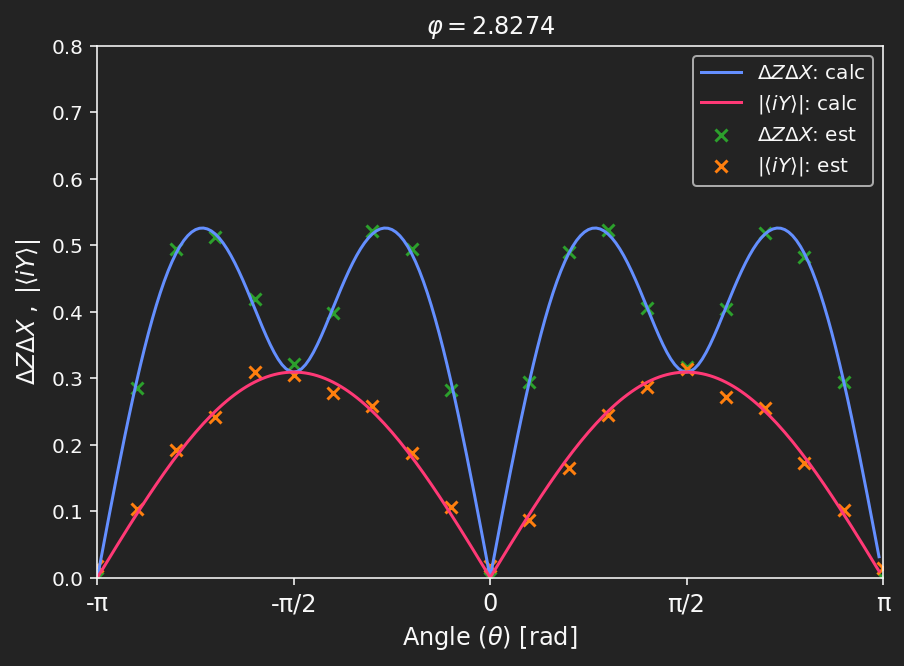

In [9]:
# Plot results from estimator and compare with theoretical curve
fig, axes = plt.subplots(1, 1)

# Compute and plot theoretical values
ΔZ = np.abs(np.sin(θ_arr))
ΔX = np.sqrt(1-np.sin(θ_arr)**2 * np.cos(φ_val)**2)
Ys = np.abs(np.sin(θ_arr)*np.sin(φ_val))
axes.plot(θ_arr,ΔZ*ΔX, label="$\\Delta Z \\Delta X$: calc")
axes.plot(θ_arr,Ys, label="$| \\langle iY \\rangle |$: calc")

#Plot results from estimator
axes.scatter(θ_short,ΔZΔX_lst, marker='x', color='tab:green', label="$\\Delta Z \\Delta X$: est")
axes.scatter(θ_short,Ys_lst, marker='x', color='tab:orange', label="$| \\langle iY \\rangle |$: est")

axes.set_xlim([-np.pi,np.pi])
axes.set_xticks(ticks=[-np.pi,-np.pi/2, 0, np.pi/2, np.pi],
                   labels=['-π','-π/2', '0', 'π/2', 'π'],fontsize=12)
axes.set_ylim([0,0.8])
axes.set_title(f'$\\varphi = ${np.around(φ_val,4)}')
axes.legend(loc='upper right')
axes.set_xlabel('Angle $(\\theta)$ [rad]',fontsize=12)
axes.set_ylabel('$\\Delta Z \\Delta X \\; , \\; |\\langle iY \\rangle |$',fontsize=12)

plt.tight_layout()
plt.show()

As can be seen, the results from the Estimator closely match the those from our calculations. Furthermore, these results hold true not only for the specific case of the $Z$ and $X$ observables we used, but for any other pair of observables. All we need to do is rely on the general uncertainty relation give by: $ \Delta A \Delta B \geq \frac{1}{2} \big| \left \langle \left[ A, B \right ] \right \rangle \big| .$

## 2. Quantum Money

One of the main issues with physical currency (like bills, coins, checks, etc.) is that they can be counterfeited relatively easily. Someone with the right set of skills and equipment can replicate as many bills as they want and deposit them in a bank account. If done with enough care, even the bank will have a hard time realizing the money is fake before the criminal has already withdrawn or transfer the funds. The [quantum money](https://en.wikipedia.org/wiki/Quantum_money) scheme was proposed as a potential way to avoid this type of scenarios by associating a quantum state with each piece of currency. 

A simple way to describe this idea is by the use of quantum coins, which can be thought of as tangible objects with an inscribed public serial number $S$ and a corresponding quantum state $|\$\rangle$:

<img src="images/03_01_05_coins.png" align = "center" width="500"/>

Physically, each coin could consist of a piece of material where $n$ electrons have been isolated and each of their spins has been randomly configured to point in one of four possible directions: 

<img src="images/03_01_06_states.png" align = "center" width="450"/>

Of course, such technology does not exist today but it is theoretically possible to implement it.

When creating a coin, the bank generates a unique serial number $S$ and associates with it an $n$-qubit state $|\$\rangle$, where each qubit can be in one of the four available states: $\big \{|0\rangle, |1\rangle, |+\rangle, |-\rangle \big \} .$ This is done by initializing all qubits in the $|0\rangle$ state, and then flipping each bit and changing its basis at random:

<img src="images/03_01_07_state_select.png" align = "center" width="450"/>

For example, if the bank were to use only $6$ qubits, a valid set of operations would be: 

$$ U = II \otimes II \otimes HI \otimes IX \otimes HX \otimes HI ,$$

which would result in a coin with a statevector given by:

$$ |\$\rangle = |0\rangle \otimes |0\rangle \otimes |+\rangle \otimes |1\rangle \otimes |-\rangle \otimes |+\rangle .$$

In Weisner's original scheme, the serial number and the quantum state are completely unrelated to each other; the bank simply uses $S$ as a public identifier to keep track of which state a given coin $k$ is in. The bank then holds an internal database with each serial number and the associated list of quantum gates necessary to generate the state of each coin:

$$
\begin{array}{|c|c|c|}
\hline
\text{Coin number} & \text{Serial Number } S & \text{Gates to generate } |\$ \rangle \\
\hline
1 & 1D062F3ABA & II \otimes \dots \otimes HI \otimes II \\
\hline
2 & 9B5ACB3425 & HX \otimes \dots \otimes IX \otimes HX \\
\hline
\vdots & \vdots & \vdots \\
\hline
k & E66F5516B3 & IX \otimes \dots \otimes HX \otimes HI \\
\hline
\vdots & \vdots & \vdots \\
\hline
\end{array}
$$

To avoid having to keep record of every single serial number and string of gates, protocols like [BBBW](https://static.aminer.org/pdf/PDF/000/120/546/quantum_cryptography_or_unforgeable_subway_tokens.pdf) suggest that one could generate the quantum state directly from the serial number by using a pseudo-random key generator, but here we will skip this complication. 

Let's use NumPy and Qiskit to create a function such as the one a bank would use to generate a valid coin state at random:

In [10]:
from IPython.display import Math
from qiskit.visualization import plot_distribution

In [11]:
# Function to generate a coin state at random
def gen_coin(n):
    
    # statevector for display purposes
    sv = '|\\$ \\rangle = '
    
    # n-qubit circuit
    qc = QuantumCircuit(n)
    
    # Iterate over each qubit
    for i in range(n-1,-1,-1):        
        state = np.random.choice(['0','1','+','-'])
        
        # select if bit should be flipped
        if state in ['1', '-']: qc.x(i)
        else: qc.id(i)
        
        # select if basis should be change
        if state in ['+','-']: qc.h(i)
        else: qc.id(i)
    
        sv += '|'+state+'\\rangle \\otimes'
        
    sv = sv[:-8]
    
    return qc, sv

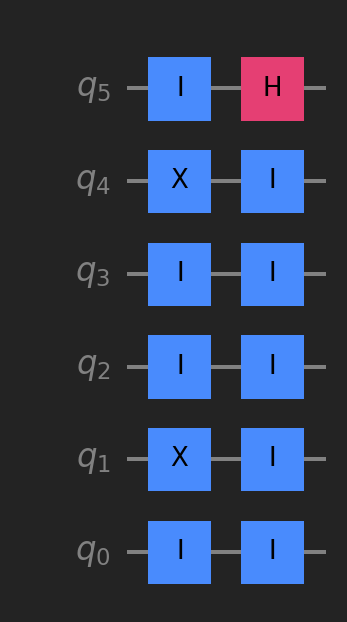

<IPython.core.display.Math object>

In [12]:
# select number of qubits and generate coin
n = 6 
qc, sv_disp = gen_coin(n)

# Save Statevector object generated by the quantum circuit
sv_coin = Statevector(qc) 

# Display circuit and statevector for n qubits
display(qc.draw(idle_wires=True))
display(Math(sv_disp))

Once a coin is issued, a customer can return to one of the bank's branches to verify if the coin is valid. The bank will check the coin's serial number and pull out the sequence of gates associated with it. By applying the inverse of such circuit and measuring the state, a valid coin will **always** return an all-zeros string:

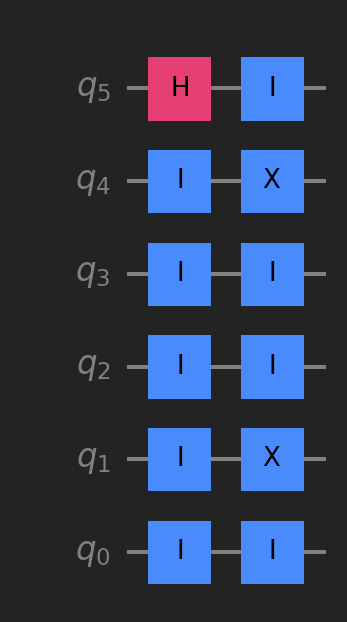

In [13]:
# Generate inverse of circuit
qc_inv = qc.inverse()
qc_inv.draw()

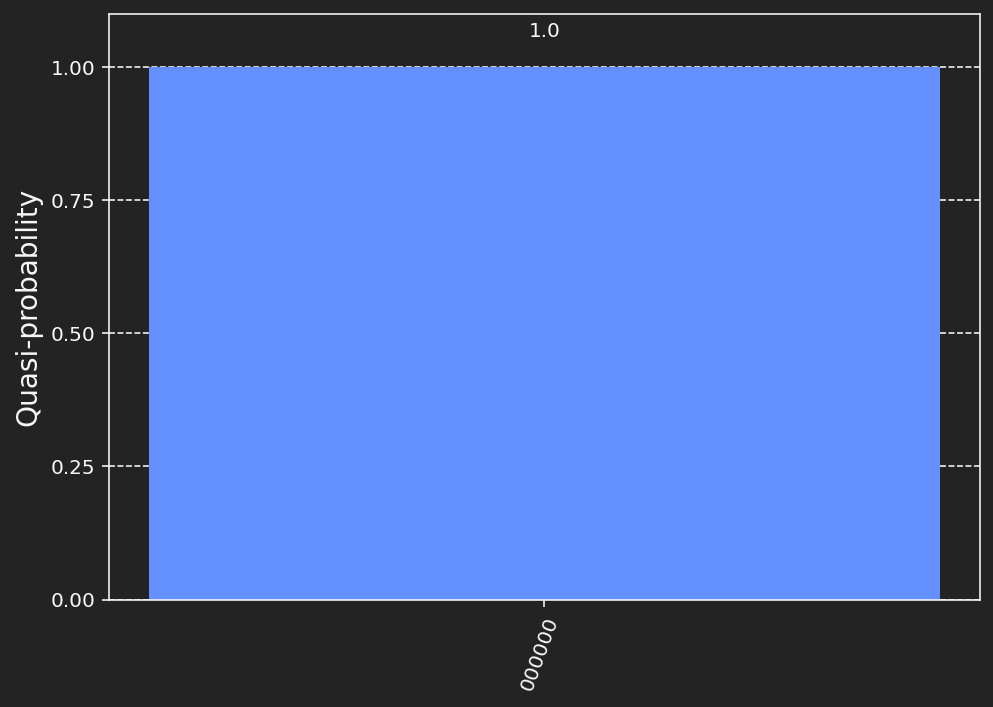

In [14]:
# Apply inverse circuit to coin statevector
sv_check = sv_coin.evolve(qc_inv)

# Display probability of measuring all-zeros string
result_probs = sv_check.probabilities_dict(decimals=5)
plot_distribution(result_probs)

Let's now consider the scenario of a criminal who wants to create a copy (or multiple copies) of a valid coin. Even if he has the same equipment as the bank to read the coin's state, he does not know the circuit that was originally used to generate the coin's statevector. If he were to directly measure the coin to try to figure out the state without applying any gates, roughly half of the resulting bits will take a random value because they were initialized in the sign basis:

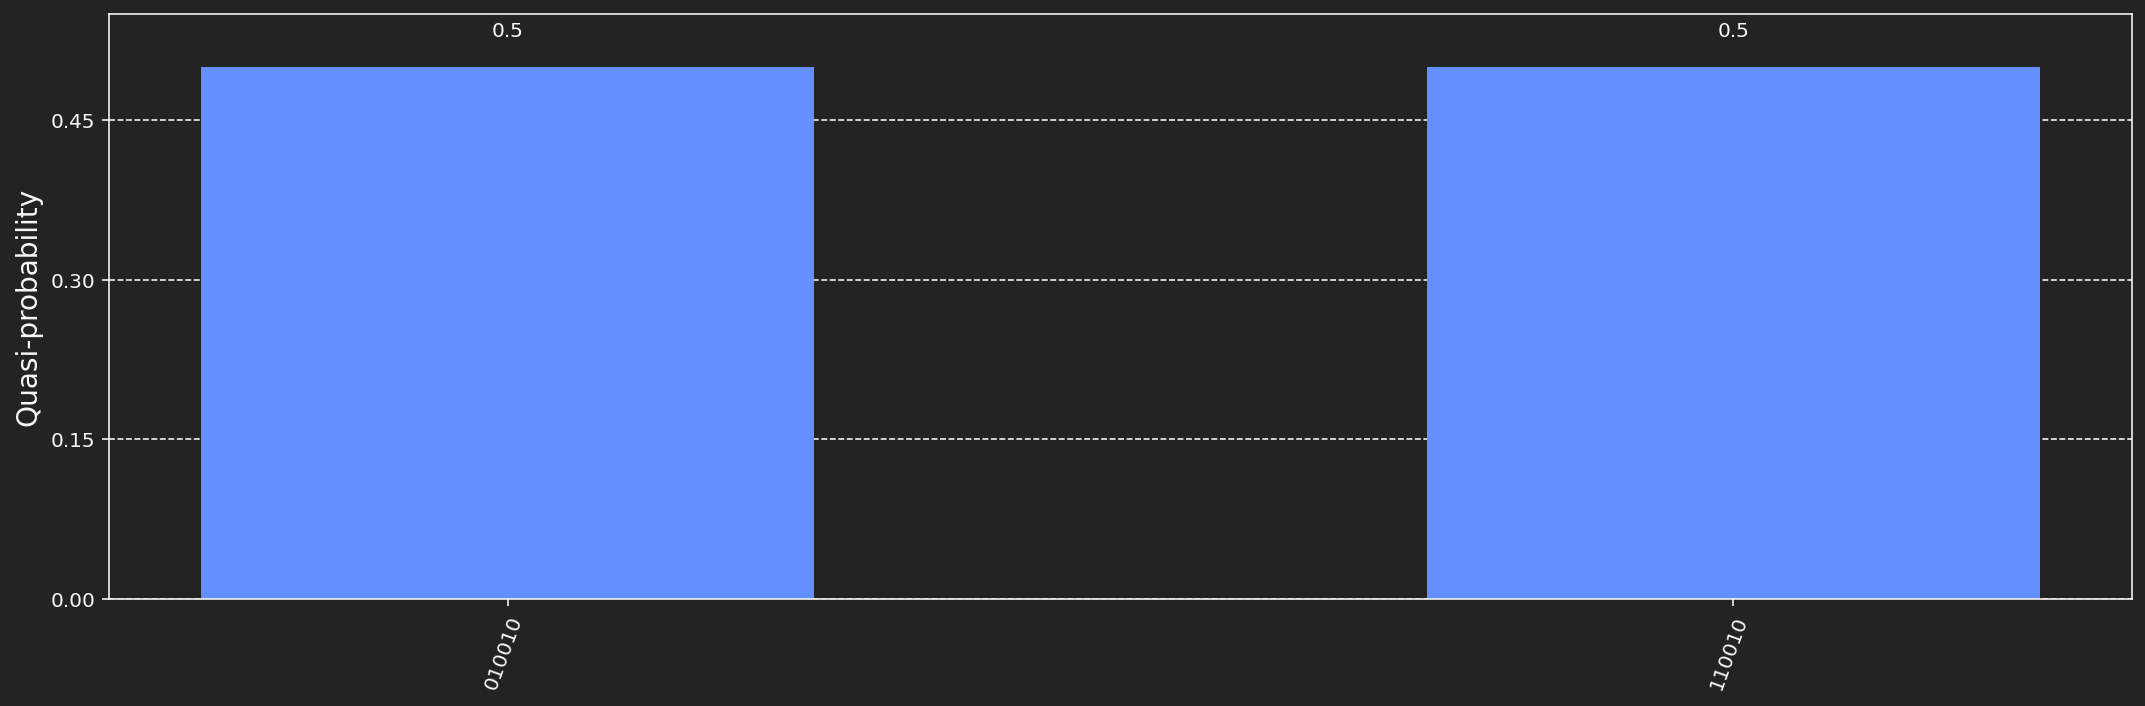

In [15]:
# Probabilities for each possible outcome when measuring in bit basis
bit_probs = sv_coin.probabilities_dict(decimals=5)
plot_distribution(bit_probs, figsize=(15,5))

On the other hand, if the criminal were to instead try to measure in the sign basis by first applying a circuit with Hadamard gates on all qubits, the other half of the qbuits will return a random outcome since they were initialized in the bit basis:

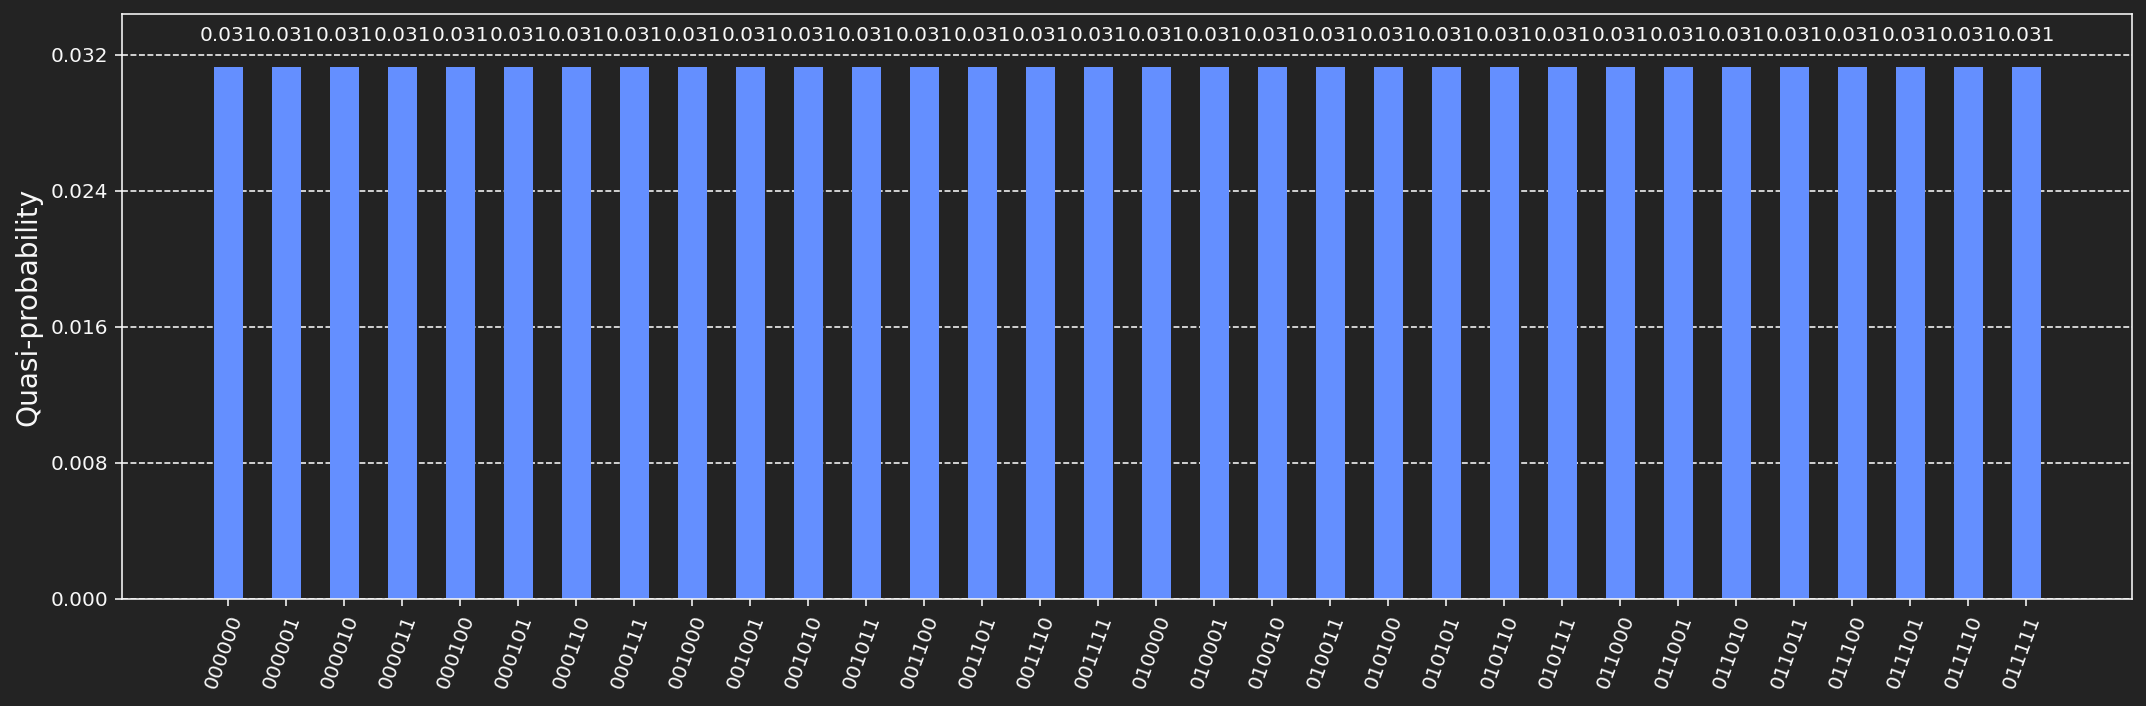

In [16]:
# Generate circuit with Hadamard gates
qc_h = QuantumCircuit(n)
qc_h.h(range(n))

# Apply H gates to coins state
sign_coin = sv_coin.evolve(qc_h)

# Probabilities for each possible outcome when measuring in sign basis
sign_probs = sign_coin.probabilities_dict(decimals=5)
plot_distribution(sign_probs, figsize=(15,5))

Furthermore, after performing just one measurement, the coin's state will get projected onto just one of the possible states, destroying its original value. This prevents the criminal from attempting to use different measurement bases until he discovers the true state's value. This uncertainty in the state's outcome is due to the fact that states $\big \{|+\rangle, |-\rangle \big \}$ are prepared in a conjugate basis to that of states $\big \{|0\rangle, |1\rangle \big \}$.

As a matter of fact, the probability of the criminal successfully guessing the state grows with the number of qubits, making it increasingly harder to duplicate a coin. Since each qubit can be in one out of $4$ possible states, the probability of randomly guessing the correct state is:

$$\mathbb{P}(\$) = \left(\frac{1}{4}\right)^n ,$$

which for a value as small as what we have in our example ($n = 6$), already gives an extremely small chance of success:

$$\mathbb{P}(\$) = \left(\frac{1}{4}\right)^6 \approx 0.000244 .$$

Another interesting note is that, even if the criminal had sophisticated technology to "couple" the qubits of a valid coin issued by the bank with the qubits of a fresh coin initialized in the all-zeros state, we know that due to the [no-cloning theorem](https://learnquantum.io/chapters/02_quantum_computing/02_04_multi_qb_sys.html#the-copy-gate-no-cloning-theorem) it will be impossible to create a replica of the original coin. At best, the criminal could create an entangled copy, but once one of the two coins is verified by the bank, the second coin's state will collapse making it unusable. 

This scheme of having physical money protected by quantum uncertainty does not seem of much practical use in today's virtual world. However, this same idea could be translated into a "virtual" quantum money protocol, where customers could have access to quantum "wallets" living in interconnected quantum memory servers. 

Now, one could argue that for virtual currency, the [double-spending problem](https://en.wikipedia.org/wiki/Double-spending) can be easily solved by having a bank (or a [blockchain](https://en.wikipedia.org/wiki/Blockchain) in the case of a decentralized system) simply check if the classical serial number associated with an asset has already been used, rendering the quantum money scheme useless. But with some modifications of the quantum money scheme, such as those introduced by quantum lighting ([Zhandry18](https://arxiv.org/abs/1711.02276)), it is potentially possible to have both protection and speed offered by quantum money, with the decentralized and public-key advantages offered by blockchain.

## Footnotes

<a name="footnote1"></a><span style="font-size: smaller;">$^*$Some [accounts](https://orsattath.wordpress.com/2021/08/14/stephen-wiesner/) seem to suggest that Weisner proposed this idea back in 1969 but it was not taken seriously enough, so his original manuscript was rejected. The paper was latter submitted and published in 1983. ([go back](#back1))</span>